# Subreddit Classification - Visual EDA

## Visualizations of high frequency overlap between nosleep and scarystories titles

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import warnings
import regex as re

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from nltk.sentiment.vader import SentimentIntensityAnalyzer
warnings.filterwarnings('ignore')
np.random.seed(824)
from bs4 import BeautifulSoup 

# Import stopwords.
from nltk.corpus import stopwords # Import the stopword list
import nltk

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

# Call in all previously curated csv's

In [2]:
title_single = pd.read_csv('../datasets/title_top_single.csv')
single = pd.read_csv('../datasets/title_single_overlap_stats.csv')

title_double = pd.read_csv('../datasets/title_top_twoword.csv')
double = pd.read_csv('../datasets/title_twoword_overlap_stats.csv')

title_triple = pd.read_csv('../datasets/title_top_threeword.csv')
triple = pd.read_csv('../datasets/title_threeword_overlap_stats.csv')

# Top Overlap Between Subreddits (Individual Words)

In [3]:
title_single['nosleep'] = title_single['nosleep'] * 100

In [4]:
title_single.rename(columns = {'Unnamed: 0' : 'Word'}, inplace = True)

In [5]:
title_single.set_index('Word', inplace = True)

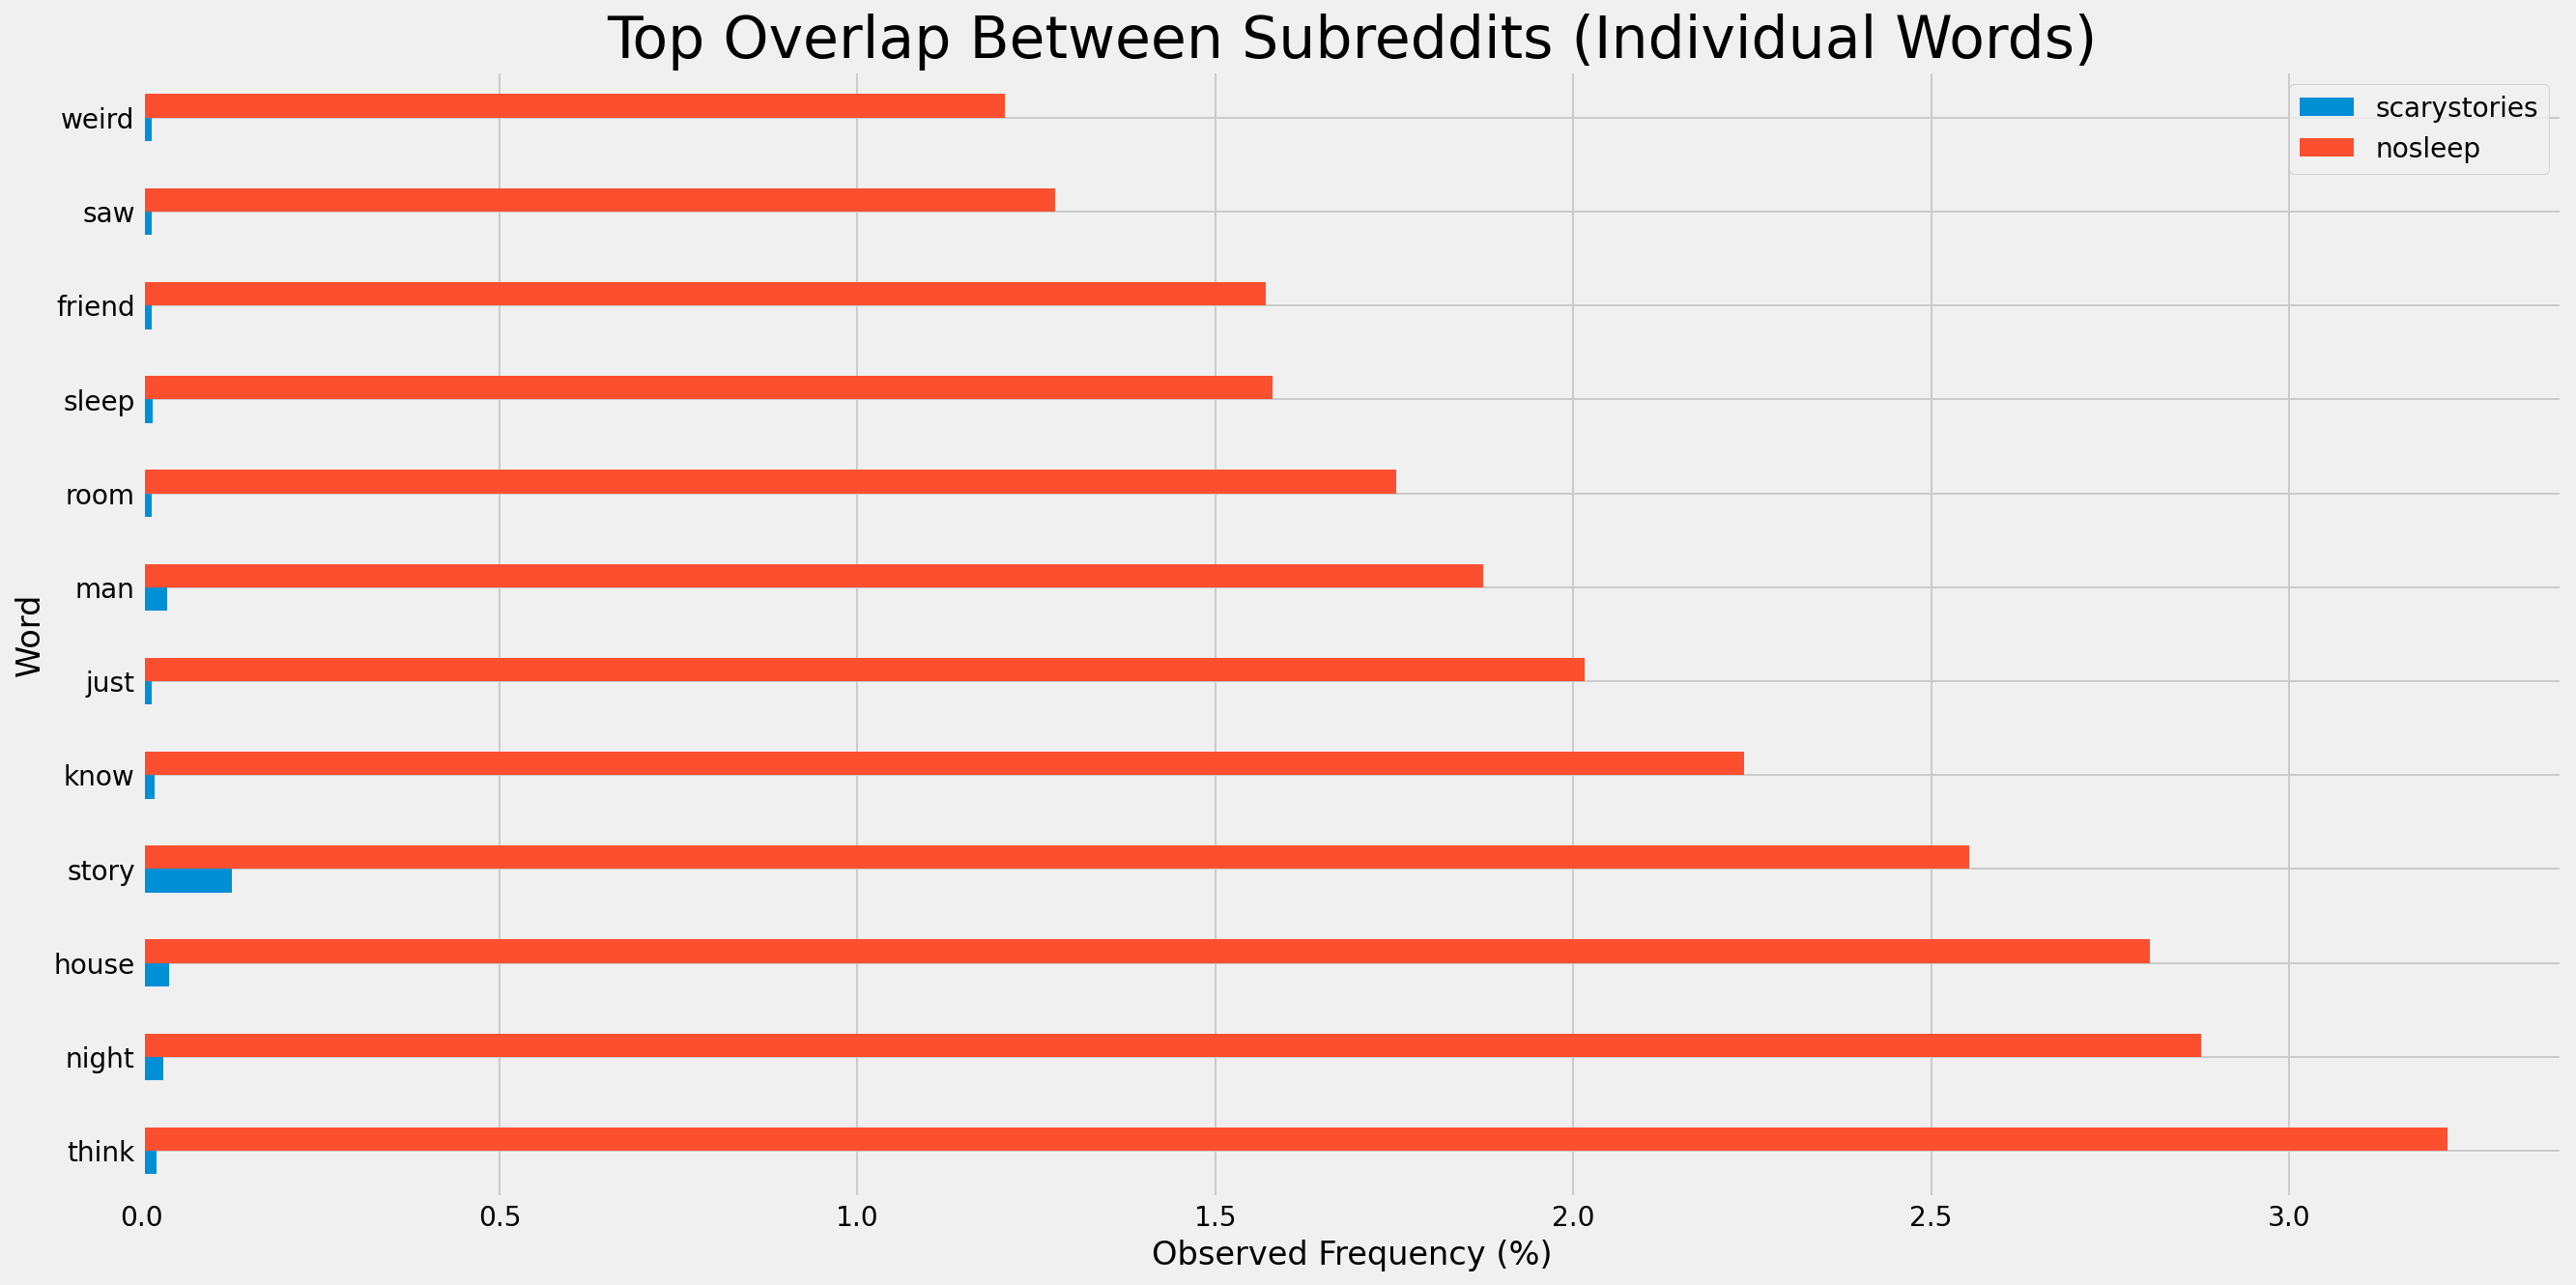

In [6]:
title_single.plot(kind = 'barh', figsize = (20,10))
plt.title('Top Overlap Between Subreddits (Individual Words)', fontsize = 30)
plt.xlabel('Observed Frequency (%)')
plt.savefig('../assets/oneword', bbox_inches='tight', dpi = 235)

# Top Overlap Between Subreddit Titles (Two Word Phrases)

In [7]:
title_double['scarystories'] = title_double['scarystories'] * 100

In [8]:
title_double['nosleep'] = title_double['nosleep'] * 100

In [9]:
title_double.rename(columns = {'Unnamed: 0' : 'Phrase'}, inplace = True)
title_double

,Phrase,scarystories,nosleep
0,years ago,0.168138,0.415316
1,sleep paralysis,0.987810,0.374797
2,serial killer,0.126103,0.303890
3,best friend,0.178646,0.293760
4,need help,0.273224,0.283630
5,true story,3.783102,0.253241
6,horror story,0.966793,0.243112
7,short story,0.199664,0.192464
8,ouija board,0.157629,0.192464
9,night shift,0.199664,0.162075


In [10]:
title_double.set_index('Phrase', inplace = True)

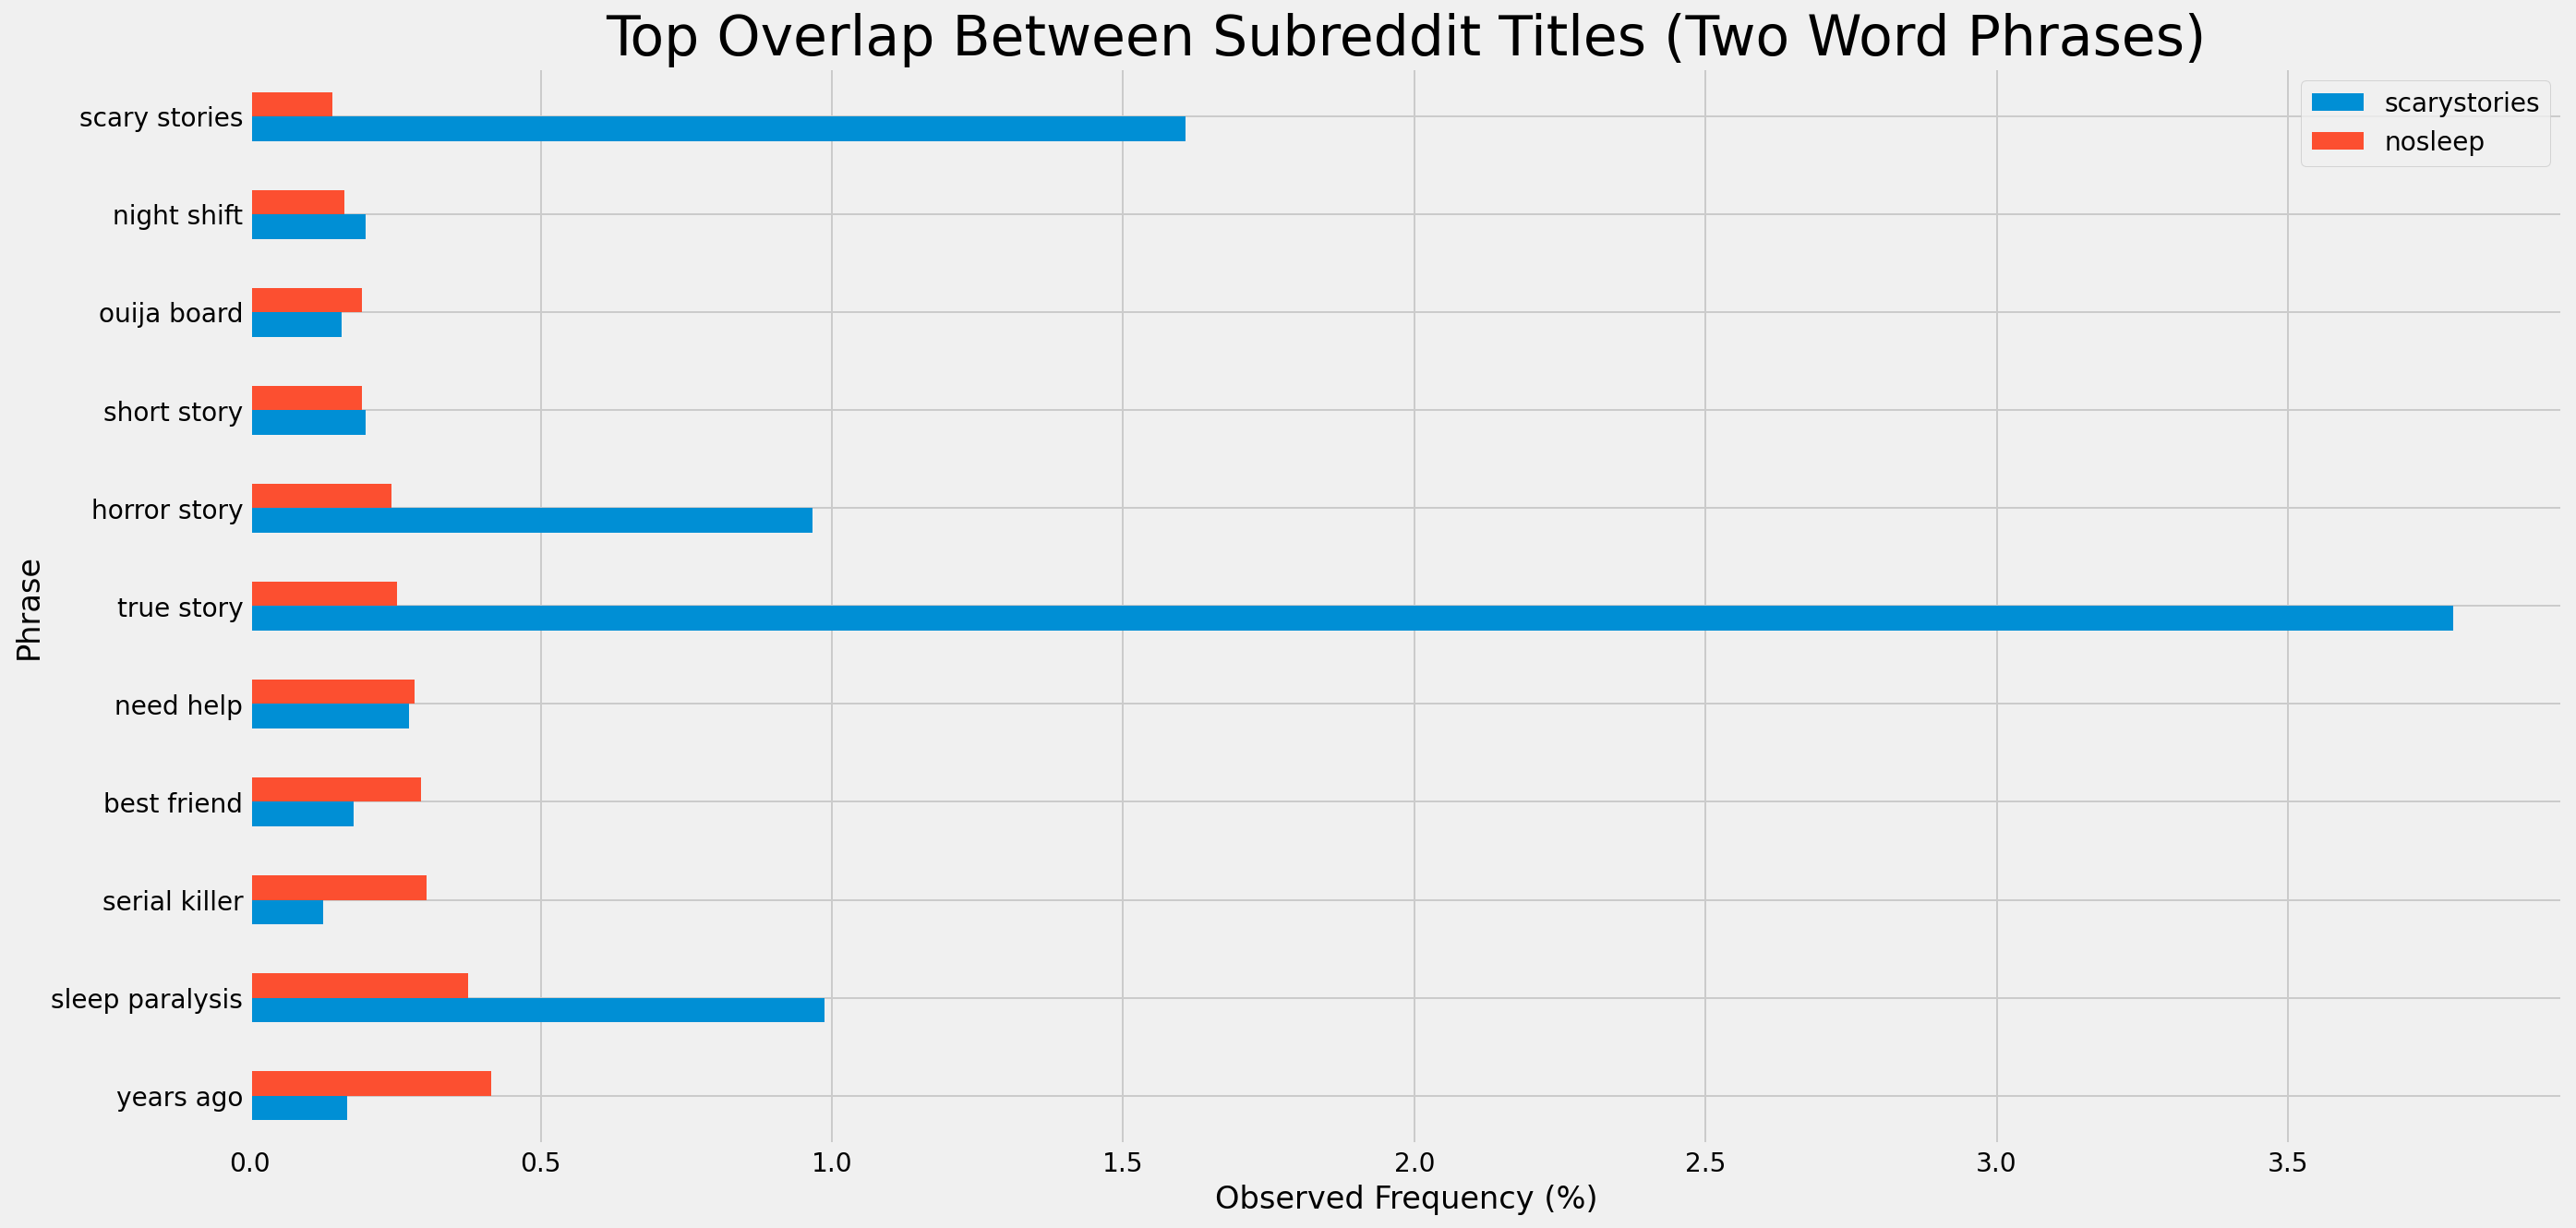

In [11]:
title_double.plot(kind = 'barh', figsize = (20,10))
plt.title('Top Overlap Between Subreddit Titles (Two Word Phrases)',fontsize = 30)
plt.xlabel('Observed Frequency (%)')
plt.savefig('../assets/twoword', bbox_inches='tight', dpi = 235)

# Top Overlap Between Subreddit Titles (Three Word Phrases)

In [12]:
title_triple['scarystories'] = title_triple['scarystories'] * 100

In [13]:
title_triple['nosleep'] = title_triple['nosleep'] * 100

In [14]:
title_triple.rename(columns = {'Unnamed: 0' : 'Phrase'}, inplace = True)
title_triple

,Phrase,scarystories,nosleep
0,happened years ago,0.021017,0.081037
1,woods dead body,0.031526,0.040519
2,true horror story,0.052543,0.040519
3,girl scared half,0.010509,0.030389
4,stopped trick treating,0.021017,0.030389
5,public doesn know,0.031526,0.030389
6,reason stopped trick,0.021017,0.030389
7,scariest thing happened,0.084069,0.030389
8,inunaki mura abandoned,0.021017,0.030389
9,sleep paralysis demon,0.031526,0.030389


In [15]:
title_triple.set_index('Phrase', inplace = True)

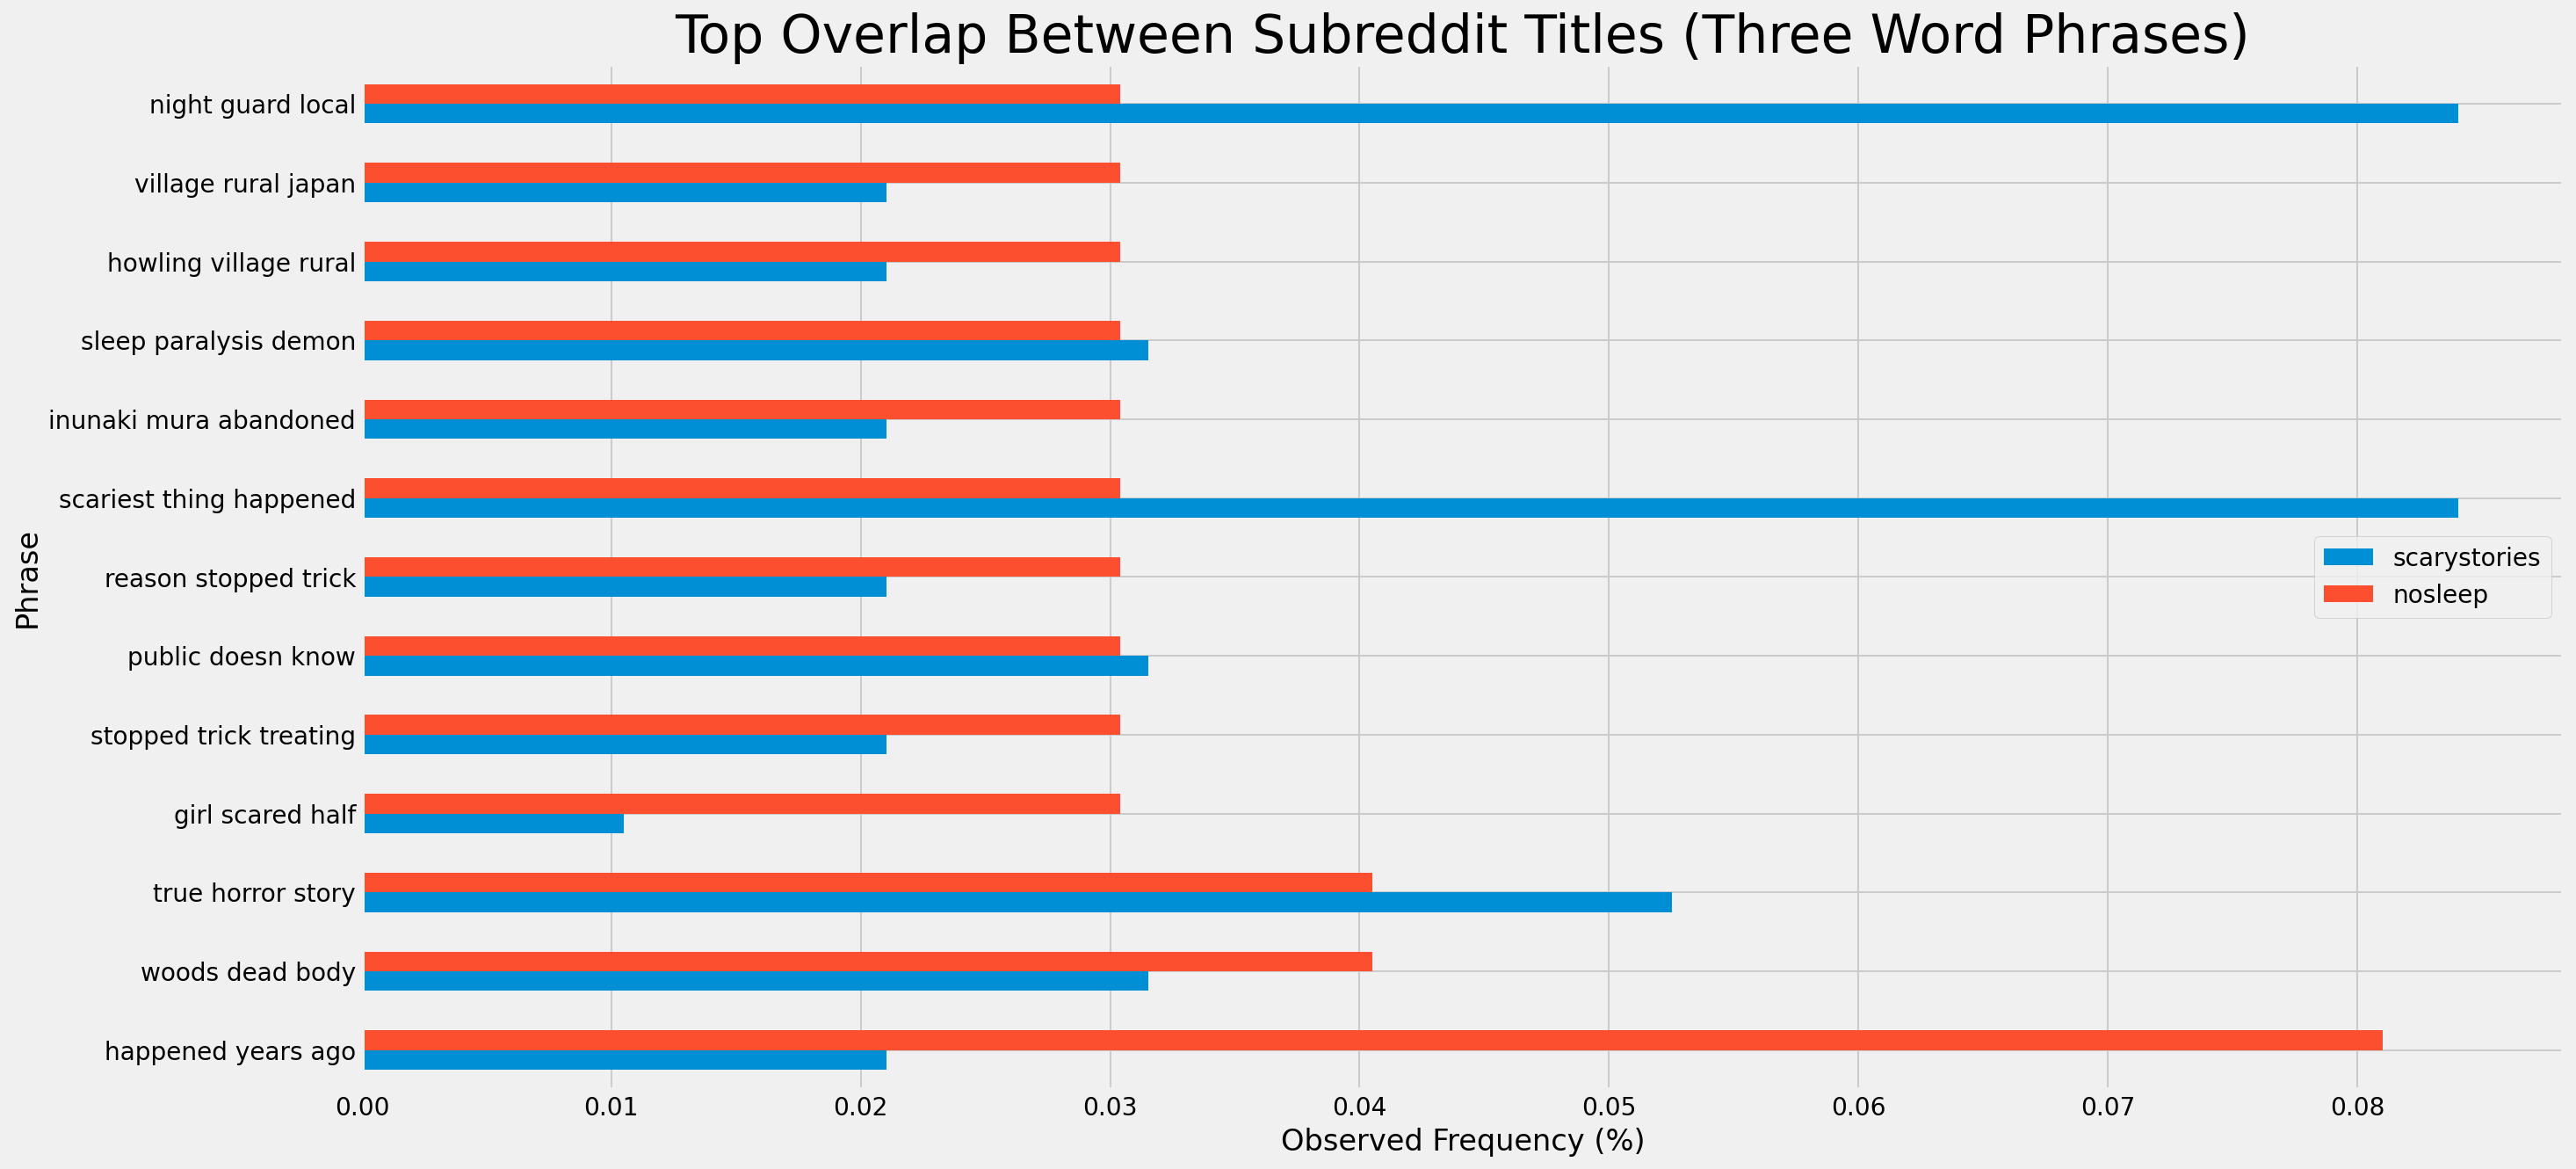

In [16]:
title_triple.plot(kind = 'barh', figsize = (20,10))
plt.title('Top Overlap Between Subreddit Titles (Three Word Phrases)',fontsize = 30)
plt.xlabel('Observed Frequency (%)')
plt.savefig('../assets/threeword', bbox_inches='tight', dpi = 235)